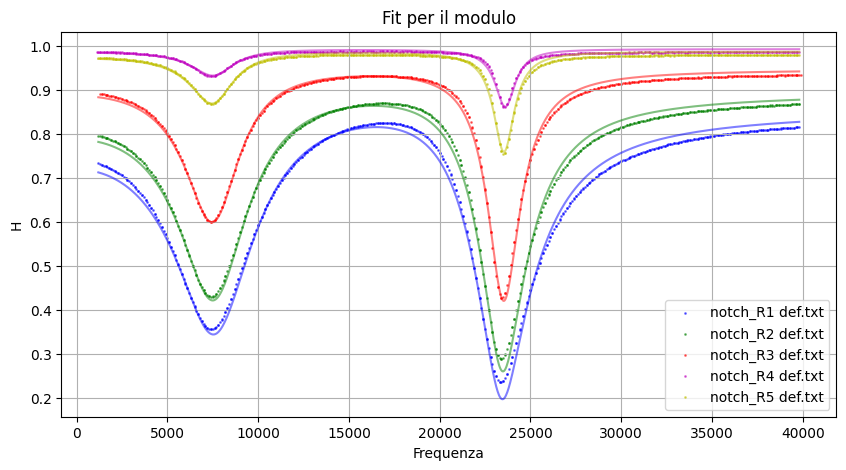

File 1 

Parametri [4.05433209e-03 1.05021890e-07 4.53254184e-04 1.01682147e-07
 7.03976242e+01 3.47447104e+00 3.86684994e+02] 

Errori [3.93224195e-05 7.48540922e-10 9.41428526e-07 2.10657337e-10
 8.74176047e-01 1.00411160e-01 1.33834477e+00] 

File 2 

Parametri [4.10318307e-03 1.04739278e-07 4.53497468e-04 1.01380039e-07
 6.89807808e+01 3.49369877e+00 5.29038109e+02] 

Errori [3.32220446e-05 6.37981315e-10 6.60747808e-07 1.55736881e-10
 7.09199838e-01 7.81418158e-02 1.67915322e+00] 

File 3 

Parametri [4.22459618e-03 1.02231213e-07 4.55083900e-04 1.00579585e-07
 6.97114216e+01 3.41332891e+00 1.06348812e+03] 

Errori [2.97245250e-05 5.58670988e-10 3.72299043e-07 1.43882242e-10
 6.06028321e-01 7.00269290e-02 3.59016301e+00] 

File 4 

Parametri [3.93562352e-03 1.07401413e-07 4.58160922e-04 9.90743402e-08
 6.80000000e+01 3.50000000e+00 8.71031504e+03] 

Errori [7.62806329e-05 1.57792866e-09 3.77364723e-07 2.03634049e-10
 1.58716724e+00 8.67103824e-02 8.59584997e+01] 

File 5 

Paramet

In [47]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

# Dati forniti
L1 = 4.576E-3  #4576
L2 = 481.5E-6 #481.5E-6
C1 = 98.8E-9
C2 = 101.3E-9
# R = (329.84, 470.53, 997.90, 9970.9) 

# R = (379.84, 520.53, 1057.90, 10020.9) 
R = (381.84, 522.53, 997.90, 9970.9, 4737.1) 

RL1 = 78.0
RL2 = 2.5

# Definizione delle funzioni per il modulo e la parte reale
def module(f, L1, C1, L2, C2, RL1, RL2, R):
    # Implementazione della funzione di modulo
    W = 2 * np.pi * f
    A1 = 1 - W**2 * L1 * C1
    A2 = 1 - W**2 * L2 * C2
    D1 = W * RL1 * C1
    D2 = W * RL2 * C2
    B1 = R + RL1 / (A1**2 + D1**2) + RL2 / (A2**2 + D2**2)
    B2 = (A1 * W * L1 - RL1 * D1) / (A1**2 + D1**2) + (A2 * W * L2 - RL2 * D2) / (A2**2 + D2**2)
    H = R / np.sqrt(B1**2 + B2**2)
    return H *(R-55)/R


# Lista per memorizzare i parametri dei fit per ciascun file
params_list_mod = []
cov_list_mod=[]
params_list_real = []

# Definizione dei limiti per i parametri del fit
# bounds_list = [
#     ([L1 - 1E-4, C1 - 1E-9, L2 - 1E-5, C2 - 1E-9, RL1 - 1, RL2 - 0.1, R[0] - 10], [L1 + 1E-4, C1 + 1E-9, L2 + 1E-5, C2 + 1E-9, RL1 + 1, RL2 + 0.1, R[0] + 10]),
#     ([L1 - 1E-4, C1 - 1E-9, L2 - 1E-5, C2 - 1E-9, RL1 - 1, RL2 - 0.1, R[1] - 10], [L1 + 1E-4, C1 + 1E-9, L2 + 1E-5, C2 + 1E-9, RL1 + 1, RL2 + 0.1, R[1] + 10]),
#     ([L1 - 1E-4, C1 - 1E-9, L2 - 1E-5, C2 - 1E-9, RL1 - 1, RL2 - 0.1, R[2] - 100], [L1 + 1E-4, C1 + 1E-9, L2 + 1E-5, C2 + 1E-9, RL1 + 1, RL2 + 0.1, R[2] + 100]),
#     ([L1 - 1E-4, C1 - 1E-9, L2 - 1E-5, C2 - 1E-9, RL1 - 1, RL2 - 0.1, R[3] - 1000], [L1 + 1E-4, C1 + 1E-9, L2 + 1E-5, C2 + 1E-9, RL1 + 1, RL2 + 0.1, R[3] + 1000]),
# ]

# ottimale per ora
bounds_list0 = [
    ([L1 - 1E-3, C1 - 1E-8, L2 - 1E-4, C2 - 1E-8, RL1 - 10, RL2 - 1, R[0] - 1000], [L1 + 1E-5, C1 + 1E-8, L2 + 1E-4, C2 + 1E-8, RL1 + 10, RL2 + 1, R[0] + 1000]),
    ([L1 - 1E-3, C1 - 1E-8, L2 - 1E-4, C2 - 1E-8, RL1 - 10, RL2 - 1, R[1] - 1000], [L1 + 1E-5, C1 + 1E-8, L2 + 1E-4, C2 + 1E-8, RL1 + 10, RL2 + 1, R[1] + 1000]),
    ([L1 - 1E-3, C1 - 1E-8, L2 - 1E-4, C2 - 1E-8, RL1 - 10, RL2 - 1, R[2] - 1000], [L1 + 1E-5, C1 + 1E-8, L2 + 1E-4, C2 + 1E-8, RL1 + 10, RL2 + 1, R[2] + 1000]),
    ([L1 - 1E-3, C1 - 1E-8, L2 - 1E-4, C2 - 1E-8, RL1 - 10, RL2 - 1, R[3] - 10000], [L1 + 1E-5, C1 + 1E-8, L2 + 1E-4, C2 + 1E-8, RL1 + 10, RL2 + 1, R[3] + 10000]),
    ([L1 - 1E-3, C1 - 1E-8, L2 - 1E-4, C2 - 1E-8, RL1 - 10, RL2 - 1, R[4] - 10000], [L1 + 1E-5, C1 + 1E-8, L2 + 1E-4, C2 + 1E-8, RL1 + 10, RL2 + 1, R[4] + 10000]),
]



# Iterazione attraverso i file e i limiti di resistenza
for file_name, bounds in zip(['notch_R1 def.txt', 'notch_R2 def.txt', 'notch_R3 def.txt', 'notch_R4 def.txt', 'notch_R5 def.txt'], bounds_list0):
    # Apertura del file in modalità di lettura
    with open(file_name, 'r') as file:
        # Lettura di tutte le righe del file
        lines = file.readlines()

    # Inizializzazione delle liste per memorizzare i dati
    x_values = []
    y_values = []
    errors_fit_list=[]

    # Iterazione attraverso le righe ed estrazione dei dati
    for line in lines:
        parts = line.split()
        x_values.append(float(parts[0]))
        y_values.append(float(parts[1]))

    # Esecuzione del fit per il modulo
    params_mod, cov_mod= curve_fit(module, x_values, y_values, bounds=bounds, maxfev=70000)
    params_list_mod.append(params_mod)
    cov_list_mod.append(cov_mod)
    
for cov in cov_list_mod:
    errors_fit_list.append(np.sqrt(np.diag(cov)))


# Plot dei dati sperimentali e dei fit per il modulo
plt.figure(figsize=(10, 5))
plt.title('Fit per il modulo')
plt.xlabel('Frequenza')
plt.ylabel('H')

for params_mod, color in zip(params_list_mod, ['b', 'g', 'r', 'm', 'y']):
    x_fit = np.linspace(min(x_values), max(x_values), 1000)
    y_mod_fit = module(x_fit, *params_mod)
    plt.plot(x_fit, y_mod_fit, linestyle='-', color=color, alpha=0.5)
    

for file_name, color in zip(['notch_R1 def.txt', 'notch_R2 def.txt', 'notch_R3 def.txt', 'notch_R4 def.txt', 'notch_R5 def.txt'], ['b', 'g', 'r', 'm', 'y']):
    with open(file_name, 'r') as file:
        lines = file.readlines()
    x_values = []
    y_values = []
    for line in lines:
        parts = line.split()
        x_values.append(float(parts[0]))
        y_values.append(float(parts[1]))
    plt.scatter(x_values, y_values, label=file_name, s=1, color=color, alpha= 0.5)

plt.legend()
plt.grid()
plt.show()


for param, err, i in zip(params_list_mod, errors_fit_list, range(5)):
    print('File', i+1, '\n')
    print('Parametri', param, '\n')
    print('Errori', err, '\n')


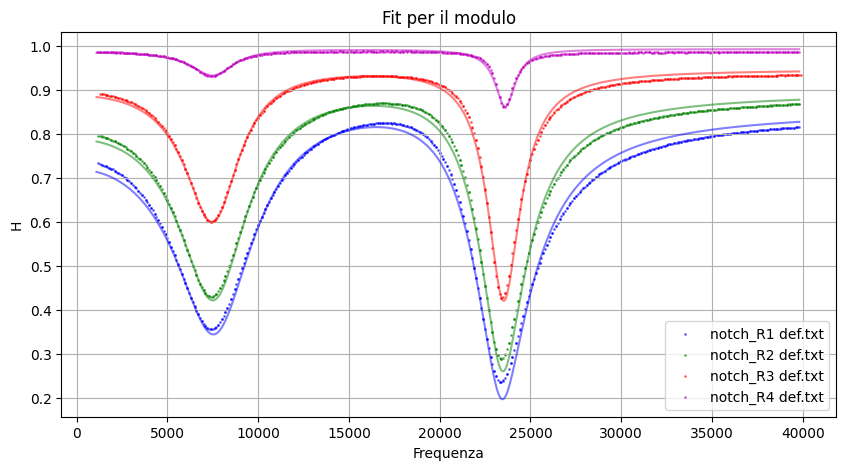

File 1 

Parametri [4.05263192e-03 1.05066187e-07 4.53168354e-04 1.01703563e-07
 7.03517136e+01 3.47116345e+00 3.86603850e+02] 

Errori [3.93052737e-05 7.48899148e-10 9.38928824e-07 2.10246482e-10
 8.73717603e-01 1.00362897e-01 1.33795619e+00] 

File 2 

Parametri [4.10273120e-03 1.04751742e-07 4.53442210e-04 1.01392414e-07
 6.89695644e+01 3.49335907e+00 5.28997929e+02] 

Errori [3.32134162e-05 6.37976094e-10 6.59803907e-07 1.55586150e-10
 7.09005888e-01 7.81097148e-02 1.67871752e+00] 

File 3 

Parametri [4.22459618e-03 1.02231213e-07 4.55083900e-04 1.00579585e-07
 6.97114216e+01 3.41332891e+00 1.06348812e+03] 

Errori [2.97245250e-05 5.58670988e-10 3.72299043e-07 1.43882242e-10
 6.06028321e-01 7.00269290e-02 3.59016301e+00] 

File 4 

Parametri [3.93562352e-03 1.07401413e-07 4.58160922e-04 9.90743402e-08
 6.80000000e+01 3.50000000e+00 8.71031504e+03] 

Errori [7.62806329e-05 1.57792866e-09 3.77364723e-07 2.03634049e-10
 1.58716724e+00 8.67103824e-02 8.59584997e+01] 



In [41]:
bounds_list1 = [
    ([L1 - 2 * 1E-3, C1 - 2 * 1E-8, L2 - 2 * 1E-4, C2 - 2 * 1E-8, RL1 - 10, RL2 - 1, R[0] - 1000], [L1 + 2 * 1E-5, C1 + 2 * 1E-8, L2 + 2 * 1E-4, C2 + 2 * 1E-8, RL1 + 10, RL2 + 1, R[0] + 1000]),
    ([L1 - 2 * 1E-3, C1 - 2 * 1E-8, L2 - 2 * 1E-4, C2 - 2 * 1E-8, RL1 - 10, RL2 - 1, R[1] - 1000], [L1 + 2 * 1E-5, C1 + 2 * 1E-8, L2 + 2 * 1E-4, C2 + 2 * 1E-8, RL1 + 10, RL2 + 1, R[1] + 1000]),
    ([L1 - 2 * 1E-3, C1 - 2 * 1E-8, L2 - 2 * 1E-4, C2 - 2 * 1E-8, RL1 - 10, RL2 - 1, R[2] - 100], [L1 + 2 * 1E-5, C1 + 2 * 1E-8, L2 + 2 * 1E-4, C2 + 2 * 1E-8, RL1 + 10, RL2 + 1, R[2]
                                                                                                   ]),
    ([L1 - 2 * 1E-3, C1 - 2 * 1E-8, L2 - 2 * 1E-4, C2 - 2 * 1E-8, RL1 - 10, RL2 - 1, R[3] - 1000], [L1 + 2 * 1E-5, C1 + 2 * 1E-8, L2 + 2 * 1E-4, C2 + 2 * 1E-8, RL1 + 10, RL2 + 1, R[3] ]),
    ]


for file_name, bounds in zip(['notch_R1 def.txt', 'notch_R2 def.txt', 'notch_R3 def.txt', 'notch_R4 def.txt'], bounds_list1):
    # Apertura del file in modalità di lettura
    with open(file_name, 'r') as file:
        # Lettura di tutte le righe del file
        lines = file.readlines()

    # Inizializzazione delle liste per memorizzare i dati
    x_values = []
    y_values = []
    errors_fit_list=[]
    
   

    # Iterazione attraverso le righe ed estrazione dei dati
    for line in lines:
        parts = line.split()
        x_values.append(float(parts[0]))
        y_values.append(float(parts[1]))

    # Esecuzione del fit per il modulo
    params_mod, cov_mod= curve_fit(module, x_values, y_values, bounds=bounds, maxfev=70000)
    params_list_mod.append(params_mod)
    cov_list_mod.append(cov_mod)
    
for cov in cov_list_mod:
    errors_fit_list.append(np.sqrt(np.diag(cov)))


# Plot dei dati sperimentali e dei fit per il modulo
plt.figure(figsize=(10, 5))
plt.title('Fit per il modulo')
plt.xlabel('Frequenza')
plt.ylabel('H')

for params_mod, color in zip(params_list_mod, ['b', 'g', 'r', 'm']):
    x_fit = np.linspace(min(x_values), max(x_values), 1000)
    y_mod_fit = module(x_fit, *params_mod)
    plt.plot(x_fit, y_mod_fit, linestyle='-', color=color, alpha=0.5)
    

for file_name, color in zip(['notch_R1 def.txt', 'notch_R2 def.txt', 'notch_R3 def.txt', 'notch_R4 def.txt'], ['b', 'g', 'r', 'm']):
    with open(file_name, 'r') as file:
        lines = file.readlines()
    x_values = []
    y_values = []
    for line in lines:
        parts = line.split()
        x_values.append(float(parts[0]))
        y_values.append(float(parts[1]))
    plt.scatter(x_values, y_values, label=file_name, s=1, color=color, alpha= 0.5)

plt.legend()
plt.grid()
plt.show()


for param, err, i in zip(params_list_mod, errors_fit_list, range(4)):
    print('File', i+1, '\n')
    print('Parametri', param, '\n')
    print('Errori', err, '\n')
